In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]=(16,8)
matplotlib.rcParams["figure.facecolor"]="#000000"

In [3]:
raw_df=pd.read_csv("train2.csv")

In [4]:
test_df=pd.read_csv("test1.csv")

In [5]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
number_col=["Pclass","Age","SibSp","Fare"]

In [8]:
categories_col=raw_df.select_dtypes(include="object").columns.tolist()

In [9]:
categories_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [23]:
target_col="Survived"

In [10]:
raw_df.Cabin=raw_df.Cabin.replace(np.nan,"No department")
test_df.Cabin=test_df.Cabin.replace(np.nan,"No department")

In [12]:
raw_df.Age.fillna(raw_df.Age.mean(),inplace=True)
test_df.fillna(test_df.Age.mean(),inplace=True)

In [15]:
raw_df.Embarked.fillna(raw_df.Embarked.mode().tolist()[0],inplace=True)

In [16]:
raw_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_df,val_df=train_test_split(raw_df,test_size=0.2,random_state=42)

In [19]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.500000,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.000000,0,0,28425,13.0000,No department,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.000000,0,0,STON/O 2. 3101293,7.9250,No department,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.000000,1,0,350025,7.8542,No department,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.000000,4,2,347082,31.2750,No department,S
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.000000,0,0,343120,7.6500,No department,S
270,271,0,1,"Cairns, Mr. Alexander",male,29.699118,0,0,113798,31.0000,No department,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.000000,2,0,350026,14.1083,No department,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.000000,1,2,113760,120.0000,B96 B98,S


In [20]:
val_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.699118,1,1,2661,15.2458,No department,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,No department,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,No department,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,No department,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,No department,C
...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.000000,0,0,STON/O 2. 3101274,7.1250,No department,S
773,774,0,3,"Elias, Mr. Dibo",male,29.699118,0,0,2674,7.2250,No department,C
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,No department,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,No department,S


In [22]:
input_col=number_col+categories_col

In [24]:
train_input=train_df[input_col].copy()
train_target=train_df[target_col].copy()

In [25]:
val_input=val_df[input_col].copy()
val_target=val_df[target_col].copy()

In [26]:
train_input

,Pclass,Age,SibSp,Fare,Name,Sex,Ticket,Cabin,Embarked
331,1,45.500000,0,28.5000,"Partner, Mr. Austen",male,113043,C124,S
733,2,23.000000,0,13.0000,"Berriman, Mr. William John",male,28425,No department,S
382,3,32.000000,0,7.9250,"Tikkanen, Mr. Juho",male,STON/O 2. 3101293,No department,S
704,3,26.000000,1,7.8542,"Hansen, Mr. Henrik Juul",male,350025,No department,S
813,3,6.000000,4,31.2750,"Andersson, Miss. Ebba Iris Alfrida",female,347082,No department,S
...,...,...,...,...,...,...,...,...,...
106,3,21.000000,0,7.6500,"Salkjelsvik, Miss. Anna Kristine",female,343120,No department,S
270,1,29.699118,0,31.0000,"Cairns, Mr. Alexander",male,113798,No department,S
860,3,41.000000,2,14.1083,"Hansen, Mr. Claus Peter",male,350026,No department,S
435,1,14.000000,1,120.0000,"Carter, Miss. Lucile Polk",female,113760,B96 B98,S


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler().fit(train_input[number_col])

In [29]:
scaler.fit(val_input[number_col])

MinMaxScaler()

In [30]:
scaler.fit(test_df[number_col])

MinMaxScaler()

In [31]:
train_input[number_col]=scaler.transform(train_input[number_col])
val_input[number_col]=scaler.transform(val_input[number_col])
test_df[number_col]=scaler.transform(test_df[number_col])

In [34]:
categories_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [35]:
raw_df[categories_col]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,No department,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,No department,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,No department,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,No department,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,No department,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [37]:
test_df[categories_col]

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,No department,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,No department,S
2,"Myles, Mr. Thomas Francis",male,240276,No department,Q
3,"Wirz, Mr. Albert",male,315154,No department,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,No department,S
...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,No department,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,No department,S
416,"Ware, Mr. Frederick",male,359309,No department,S


In [38]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder=OneHotEncoder(sparse=False,handle_unknown="ignore").fit(raw_df[categories_col])
encoder.fit(test_df[categories_col])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [42]:
encoded_col=list(encoder.get_feature_names(categories_col))

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
encoded_col1=list(encoder.get_feature_names(categories_col))

In [44]:
encoded_col1

['Name_Abbott, Master. Eugene Joseph',
 'Name_Abelseth, Miss. Karen Marie',
 'Name_Abelseth, Mr. Olaus Jorgensen',
 'Name_Abrahamsson, Mr. Abraham August Johannes',
 'Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
 'Name_Aks, Master. Philip Frank',
 'Name_Aldworth, Mr. Charles Augustus',
 'Name_Allison, Mr. Hudson Joshua Creighton',
 'Name_Andersen, Mr. Albert Karvin',
 'Name_Andersson, Miss. Ida Augusta Margareta',
 'Name_Andersson, Mr. Johan Samuel',
 'Name_Andrew, Mr. Frank Thomas',
 'Name_Angheloff, Mr. Minko',
 'Name_Angle, Mr. William A',
 'Name_Aronsson, Mr. Ernst Axel Algot',
 'Name_Ashby, Mr. John',
 'Name_Asplund, Master. Carl Edgar',
 'Name_Asplund, Master. Filip Oscar',
 'Name_Asplund, Mr. Carl Oscar Vilhelm Gustafsson',
 'Name_Asplund, Mr. Johan Charles',
 'Name_Assaf Khalil, Mrs. Mariana (Miriam")"',
 'Name_Assaf, Mr. Gerios',
 'Name_Assam, Mr. Ali',
 'Name_Astor, Col. John Jacob',
 'Name_Baccos, Mr. Raffull',
 'Name_Badman, Miss. Emily Louisa',
 'Name_Baimbrigge, Mr. C

In [46]:
train_input[encoded_col]=encoder.transform(train_input[categories_col])
val_input[encoded_col]=encoder.transform(val_input[categories_col])
test_df[encoded_col1]=encoder.transform(test_df[categories_col])

In [49]:
train_inputs=train_input[number_col+encoded_col].copy()
val_inputs=val_input[number_col+encoded_col].copy()
test_inputs=test_df[number_col+encoded_col1].copy()

In [50]:
from sklearn.tree import DecisionTreeClassifier 

In [51]:
model=DecisionTreeClassifier(max_depth=4,random_state=42)

In [53]:
%time
model.fit(train_inputs,train_target)

Wall time: 0 ns


DecisionTreeClassifier(max_depth=4, random_state=42)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [58]:
train_pre=model.predict(train_inputs)

In [59]:
val_pre=model.predict(val_inputs)

In [60]:
pd.value_counts(train_pre)

0    523
1    189
dtype: int64

In [62]:
predict_proba=model.predict(train_inputs)
len(predict_proba)

712

In [63]:
accuracy_score(train_target,train_pre)

0.8441011235955056

In [65]:
model.score(val_inputs,val_target)

0.8100558659217877

In [66]:
accuracy_score(val_target,val_pre)

0.8100558659217877

In [103]:
val_target.value_counts()/len(val_target)

0    0.586592
1    0.413408
Name: Survived, dtype: float64

In [104]:
predict_test=model.predict(test_df1)

In [105]:
len(predict_test)

418

In [67]:
from xgboost import XGBClassifier

In [71]:
xgb=XGBClassifier(random_state=42,n_jobs=-1)

In [72]:
xgb.fit(train_inputs,train_target)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
from sklearn.metrics import mean_squared_error
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [109]:
train_pred=xgb.predict(train_inputs)
rmse(train_pred,train_target)

0.17173928502958172

In [79]:
def try_params(**params):
    xgb=XGBClassifier(random_state=42,n_jobs=-1,**params)
    xgb.fit(train_inputs,train_target)
    accuracy_train=xgb.score(train_inputs,train_target)
    accuracy_val=xgb.score(val_inputs,val_target)
    return (accuracy_train,accuracy_val)

In [82]:
try_params( n_estimators=10)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.8932584269662921, 0.8491620111731844)

In [88]:
try_params( n_estimators=10)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.8932584269662921, 0.8491620111731844)

In [107]:
try_params(learning_rate=0.9,n_estimators=110,subsample=0.5,booster="gblinear",max_depth=6)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.8370786516853933, 0.8100558659217877)

In [137]:
try_params(n_estimators=100)

XGBoostError: [23:13:47] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/data/data.cc:583: Check failed: labels_.Size() == num_row_ (455 vs. 364) : Size of labels must equal to number of rows.

In [110]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

In [111]:
importance_df

,feature,importance
422,Sex_female,0.449230
0,Pclass,0.173299
463,Ticket_1601,0.110272
863,Cabin_No department,0.070767
2,SibSp,0.051651
...,...,...
295,"Name_Pallas y Castello, Mr. Emilio",0.000000
296,"Name_Palsson, Master. Paul Folke",0.000000
297,"Name_Parker, Mr. Clifford Richard",0.000000
298,"Name_Payne, Mr. Vivian Ponsonby",0.000000


In [112]:
from sklearn.model_selection import KFold

In [115]:
def train_and_evaluate(train_inputs, train_target, val_inputs, val_target, **params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params)
    model.fit(train_inputs, train_target)
    train_rmse = rmse(model.predict(train_inputs), train_target)
    val_rmse = rmse(model.predict(val_inputs), val_target)
    return model, train_rmse, val_rmse

In [114]:
kfold = KFold(n_splits=5)

In [126]:
targets=raw_df[target_col].copy()
targets

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [124]:
X=train_inputs[number_col+encoded_col].copy()

In [127]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    train_inputs, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    val_inputs, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(train_inputs, 
                                                     train_targets, 
                                                     val_inputs, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train RMSE: 0.4629100498862757, Validation RMSE: 0.7032108464077431
[23:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train RMSE: 0.4944749685327807, Validation RMSE: 0.5741692517632145
[23:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train RMSE: 0.4385290096535146, Validation RMSE: 0.628970902033151
[23:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train RMSE: 0.4658679716754169, Validation RMSE: 0.6874063372761939
[23:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train RMSE: 0.4447495899966607, Validation RMSE: 0.7109813678954643


In [128]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [129]:
preds = predict_avg(models, X)
preds

array([0.2, 0. , 0.4, 1. , 0. , 0. , 0. , 0.4, 1. , 0.4, 1. , 0.6, 0.4,
       0. , 0. , 0.6, 0. , 0.6, 0. , 0.6, 0. , 0.8, 0.8, 0.4, 0. , 0.8,
       0. , 0. , 0.2, 0.2, 0.2, 0.6, 0.6, 0. , 0. , 0. , 0.4, 0. , 0.6,
       1. , 0. , 0.6, 0. , 0.8, 1. , 0. , 0.2, 0.6, 0. , 0.2, 0.4, 0. ,
       0. , 0.8, 0. , 0.4, 0.8, 0. , 0. , 0.6, 0. , 0.8, 0.4, 0. , 0. ,
       0. , 0.6, 0. , 0.8, 0. , 0.2, 0. , 0.2, 0. , 0.2, 0. , 0. , 0.2,
       0.8, 0. , 0. , 0.4, 0.2, 0. , 0.6, 0.2, 0. , 0. , 1. , 0. , 0. ,
       0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0.2, 0. , 0.2, 0. , 0. , 0. ,
       0. , 0. , 0.2, 0.4, 0.2, 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.4, 1. , 0. , 0.2, 0.8, 0.2,
       0.2, 0. , 0.8, 0.6, 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0.4, 0.4,
       1. , 0. , 0. , 0.4, 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0.4, 0.6,
       0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0.6, 0.6, 0.8, 0.2, 0. ,
       0. , 0.4, 0. , 1. , 0.4, 0. , 0. , 0.4, 0. , 0. , 0. , 0.

In [101]:
df=pd.DataFrame()
df["PassengerId"]=test_df["PassengerId"]
df["Survived"]=xgb.predict(test_inputs)

In [102]:
df.to_csv("s2.csv",index=False)

In [109]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_input, train_target)
    train_acc = 1 - model.score(train_input, train_target)
    val_acc = 1 - model.score(val_input, val_target)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [110]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

Wall time: 751 ms


In [111]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.212079,0.217877
1,2,0.196629,0.234637
2,3,0.162921,0.201117
3,4,0.155899,0.189944
4,5,0.147472,0.206704
5,6,0.125000,0.178771
6,7,0.108146,0.189944
7,8,0.098315,0.167598
8,9,0.087079,0.167598
9,10,0.084270,0.189944


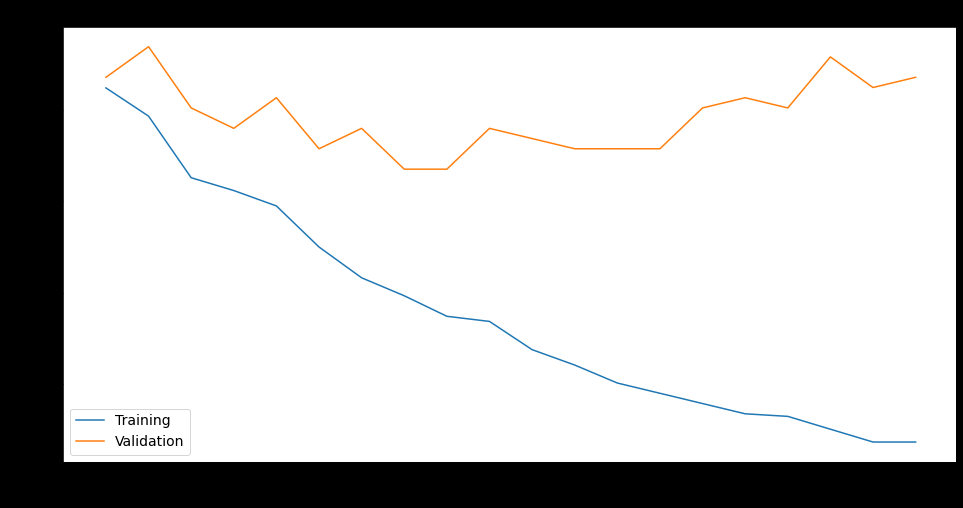

In [112]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
model3 = RandomForestClassifier(n_jobs=-1, random_state=42,max_features=9)

In [153]:
%%time
model3.fit(train_input, train_target)

Wall time: 305 ms


RandomForestClassifier(max_features=9, n_jobs=-1, random_state=42)

In [158]:
model3.score(train_input, train_target)

0.9845505617977528

In [159]:
model3.score(val_input,val_target)

0.8379888268156425

In [156]:
def test_params(**params):
    model4 = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_input, train_target)
    return model4.score(train_input, train_target), model4.score(val_input, val_target)

In [157]:
test_params(max_features=9)

(0.9845505617977528, 0.8379888268156425)

In [163]:
predict_test1=model3.predict(test_df1)

In [164]:
predict_test1

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [165]:
df["PassengerId"]=test_df["PassengerId"].copy()

In [166]:
df["Survived"]=predict_test1

In [167]:
df.to_csv("New3.csv",index=False)